In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Create a database session object
session = Session(engine)

In [10]:
# Save references to each table
measurement_class = Base.classes.measurement
measurement_data = session.query(measurement_class).distinct().all()

station_class = Base.classes.station
station_data = session.query(station_class).distinct().all()

In [11]:
# Create our session (link) from Python to the DB
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
date_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_recent

('2017-08-23',)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latestdate = dt.datetime.strptime(date_recent[0], '%Y-%m-%d')
latestdate

datetime.datetime(2017, 8, 23, 0, 0)

In [14]:
# Calculate the date one year from the last date in data set.
#year_back = dt.date(2017,8,23) - dt.timedelta(days=365)

querydate = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
querydate

datetime.date(2016, 8, 23)

In [15]:
# latestdate = dt.datetime.strptime(date_recent[0], '%Y-%m-%d')
sel = [Measurement.date,Measurement.prcp]
queryresult = session.query(*sel).filter(Measurement.date >= querydate).all()

In [16]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
data = session.query(*sel).filter(Measurement.date >= querydate).all()
data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data,columns=['Date','Precipitation'])
df = df.dropna(how='any') # clean up non value entries

In [18]:
df.set_index('Date',inplace=True)

In [19]:
# Sort the dataframe by date
df = df.sort_values('Date',ascending=True)
df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


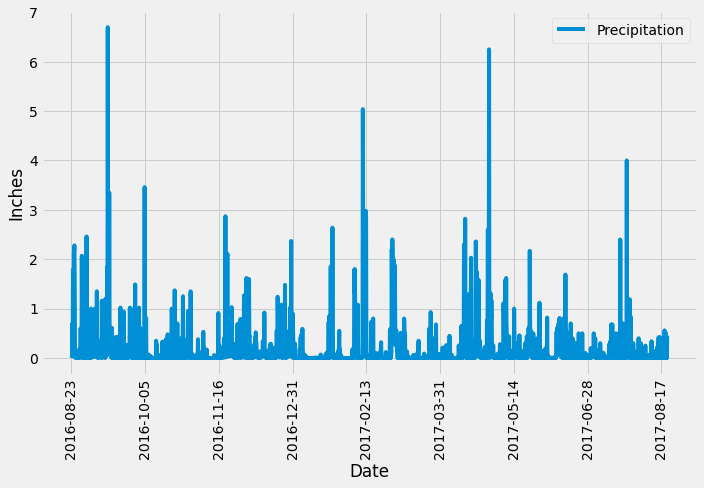

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize=(10,7),rot=90).legend(loc='upper right')

plt.ylabel('Inches')
plt.tight_layout()

plt.savefig('Images/Precipitation_Analysis.png')

plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
sel = [Measurement.station,func.count(Measurement.id)]
# List the stations and the counts in descending order.
station_act = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_act


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,func.count(Measurement.id),func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
act_station_temp = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()
act_station_temp
#print(f"Most active Station {},max{} ",act_station_temp[0],act_station_temp[1])

print("Most active Station ID {}, Lowest Temperature {}, Highest Temperature {}, Average Temperature {}".format(act_station_temp[0],act_station_temp[2],act_station_temp[3],act_station_temp[4]))

Most active Station ID USC00519281, Lowest Temperature 54.0, Highest Temperature 85.0, Average Temperature 71.66378066378067


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.station,Measurement.date,Measurement.tobs]
temp_data = session.query(*sel).filter(Measurement.station==act_station_temp[0],Measurement.date >= querydate).all()
temp_data

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [46]:
temp_data_df = pd.DataFrame(temp_data,columns=['station','date','tobs'])
temp_data_df

,station,date,tobs
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0
...,...,...,...
347,USC00519281,2017-08-14,77.0
348,USC00519281,2017-08-15,77.0
349,USC00519281,2017-08-16,76.0
350,USC00519281,2017-08-17,76.0


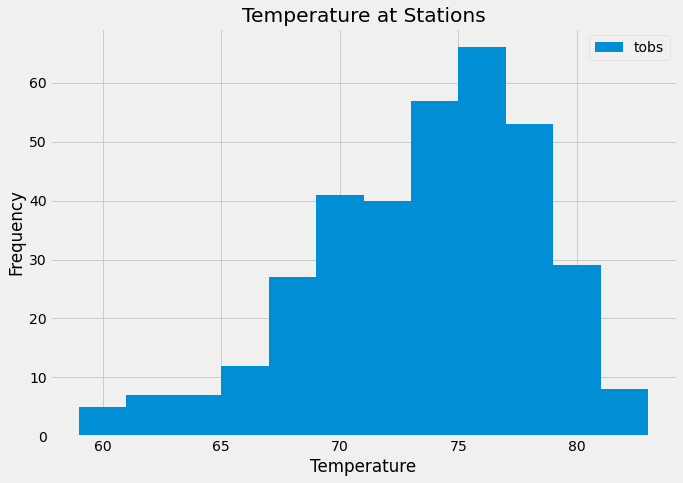

In [58]:
temp_data_df.hist(column="tobs",bins=12,figsize=(10, 7),legend=True)
plt.title("Temperature at Stations")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('Images/Station_Analysis.png')

# Close session

In [28]:
# Close Session
session.close()

# Flask